In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from training_data import read_data
import io

X = read_data.read_data()
# print(X)

shape of X =  (4096, 312)
mu =  [[237.45192308]
 [237.45192308]
 [234.40705128]
 ...
 [249.22115385]
 [251.37820513]
 [251.37820513]]
size mu =  (4096, 1)
shape of centered =  (4096, 312)
(4096, 312)
(312,)
(312, 312)


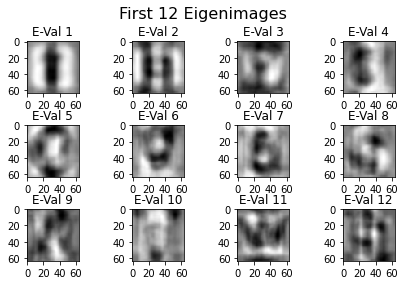

In [2]:
dt = np.double
print("shape of X = ", np.shape(X))
numrows, numcols = np.shape(X)


shape = (numrows, 1)
count = np.zeros(shape,dtype=dt)
for i in range(numcols):
    count += np.reshape(X.T[i],(numrows,1))

mu = (1/numcols)*count

print("mu = ", mu)
print("size mu = ", np.shape(mu))
# print(np.shape(np.reshape(X.T[i],(numrows, 1))))

shape = (numrows, 1)
centered = np.zeros((numrows,1),dtype=dt)
for i in range(numcols):
#     np.reshape(centered.T[i], (numrows, 1))
#     print(np.shape(np.reshape(centered.T[i], (numrows, 1))))
    temp = np.reshape(X.T[i], (numrows, 1)) - mu
    centered = np.append(centered, temp, 1)

centered = np.delete(centered,0,axis = 1)

# print(centered)
print("shape of centered = ", np.shape(centered))

numimages = numcols
Z = (1/np.sqrt(numimages-1))*centered
u, s, vh = np.linalg.svd(Z, full_matrices=False, compute_uv=True, hermitian=False)

print(u.shape)
print(s.shape)
print(vh.shape)

n = 3
m = 4
fig, axs = plt.subplots(n,m)
dim = 64
fig.suptitle('TEST PLEASE WORK')
# axs[0, 0] = plt.imshow(np.reshape(u.T[0], (dim, dim)), cmap=plt.cm.gray)
# axs[0, 1] = plt.imshow(np.reshape(u.T[1], (dim, dim)), cmap=plt.cm.gray)

num = 12
# fig, axs = plt.subplots(3, 4)
# plt.subplots_adjust(left=0.1,bottom=0.8,top = 0.9, wspace=0.4,hspace=0.6)
fig.suptitle('First 12 Eigenimages', fontsize=16)
fig.tight_layout()
for k in range(num):
    img=np.reshape(u.T[k], (dim, dim))
    axs[k//4,k%4].imshow(img,cmap=plt.cm.gray, interpolation='none')
    axs[k//4,k%4].set_title('E-Val ' + str(k+1), fontsize=12)
    axs[k//4,k%4].set_yticks([0, 20, 40, 60])
    axs[k//4,k%4].set_xticks([0, 20, 40, 60])
    
png1 = io.BytesIO()
fig.savefig(png1, format="png")
img_out = Image.open(png1)
img_out.save("F12Eig.tif")
png1.close()
    

(312, 312)
[[-3084.5041568  -1907.39654325 -1705.15078105 -1801.50365574]
 [  -96.61139317  2240.51216154 -1003.45167378   799.00292751]
 [  922.2022264  -1828.0636984   1318.38724218 -1472.45100434]
 [-2555.64632131   579.20472263     9.66337126 -1221.70859553]
 [  788.21044106   249.24450862  3480.44815597   893.68313009]
 [ -127.71751135 -3011.42353783 -1013.43444006 -1332.6739329 ]
 [ 1238.26802831   612.43002294  -358.82067526  1653.20137902]
 [ -487.04905028   -80.67833037   489.65855171   834.08326652]
 [ 1279.10757933  -551.70148633   -65.8426798   1989.70907599]
 [ -377.54227456   307.48854809  -165.9069466   2576.04915435]]
(10, 4)


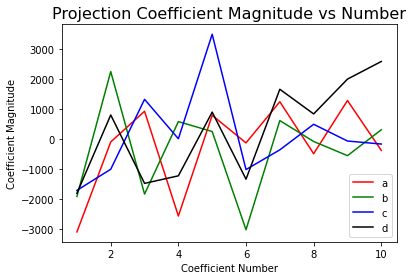

In [3]:
shape = (numrows, 1)
Y = np.zeros((numcols,1),dtype=dt)
for i in range(numcols):
    temp = np.dot(np.transpose(u),np.reshape(centered.T[i], (numrows, 1)))
    Y = np.append(Y, temp, 1)

Y = np.delete(Y,0,axis = 1)
print(np.shape(Y))
# print(Y)
# print(np.shape(Y))


coeffs = np.zeros((10,4),dtype=dt)
nums = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in range(10):
    for j in range(4):
        coeffs[i, j] = Y[i, j]
        
print(coeffs)
print(np.shape(coeffs))
        
# print(coeffs[:,1])

plt.plot(nums, coeffs[:,0],'r-')
plt.plot(nums, coeffs[:,1],'g-')
plt.plot(nums, coeffs[:,2],'b-')
plt.plot(nums, coeffs[:,3],'k-')
plt.xlabel('Coefficient Number')
plt.ylabel('Coefficient Magnitude')
plt.title('Projection Coefficient Magnitude vs Number', fontsize=16)
plt.legend(['a', 'b', 'c', 'd'])
png1 = io.BytesIO()
plt.savefig(png1, format="png")
img_out = Image.open(png1)
img_out.save("ProjCoeffs.tif")
png1.close()
plt.show()

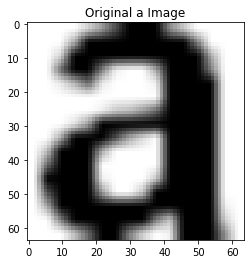

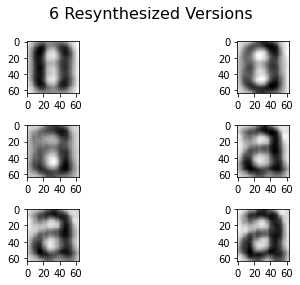

In [4]:
vals = [1, 5, 10, 15, 20, 30]

# calculate y using 24
# calculate xhat using 25


img=np.reshape(X.T[0], (dim, dim))
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original a Image')
png1 = io.BytesIO()
plt.savefig(png1, format="png")
img_out = Image.open(png1)
img_out.save("aaa.tif")
png1.close()




num = 12
fig, axs = plt.subplots(3, 2)
# plt.subplots_adjust(left=0.1,bottom=0.8,top = 0.9, wspace=0.4,hspace=0.6)


# STILL NEED TO SUBTRACT OFF MEAN?????

fig.suptitle('6 Resynthesized Versions', fontsize=16)
fig.tight_layout()
ms = [1, 5, 10, 15, 20, 30]
num = 6
for k in range(num):
    Um = u[:,0:ms[k]]
    Y = np.dot(np.transpose(Um),centered)
    Xtil = np.dot(Um,Y)
#     print(np.shape(Xtil))
    Xtilp = np.reshape(Xtil.T[0],(numrows,1)) + mu
    img=np.reshape(Xtilp, (dim, dim))
    axs[k//2,k%2].imshow(img,cmap=plt.cm.gray, interpolation='none')
    axs[k//2,k%2].set_yticks([0, 20, 40, 60])
    axs[k//2,k%2].set_xticks([0, 20, 40, 60])
#     axs[k//2,k%2].set_title('E-Val ' + str(k+1), fontsize=12)
#     axs[k//2,k%2].set_yticks([0, 20, 40, 60])
#     axs[k//2,k%2].set_xticks([0, 20, 40, 60])

png1 = io.BytesIO()
fig.savefig(png1, format="png")
img_out = Image.open(png1)
img_out.save("Resynth.tif")
png1.close()
# m = 5
# Um = u[:,0:m]
# Y = np.dot(np.transpose(Um),X)
# Xtil = np.dot(Um,Y)


# print(np.shape(Um))

# fig.suptitle('First 12 Eigenimages', fontsize=16)
# fig.tight_layout()
# for k in range(num):
#     img=np.reshape(np.reshape(u.T[k], (dim, dim)),(64,64))
#     axs[k//4,k%4].imshow(img,cmap=plt.cm.gray, interpolation='none')
#     axs[k//4,k%4].set_title('E-Val ' + str(k+1), fontsize=12)
#     axs[k//4,k%4].set_yticks([0, 20, 40, 60])
#     axs[k//4,k%4].set_xticks([0, 20, 40, 60])


# U = u[:,i]
# print(np.shape(U))

In [5]:
# Starting Q5
import math
from test_data import read_data_test
# from read_data_test import read_data_test

A = u[:,0:10]
# print(centered)
# print(A)

Y = np.dot(np.transpose(A),np.reshape(centered,(numrows, numcols)))
print(np.shape(Y))
# print(Y)

alphabet = 26
Ck = 12

params = []
a = {'mean': 0, 'cov': 1}
params.append(a)


count1 = np.zeros((10,1,26),dtype=dt)
for k in range(312):
    i = k%26
    count1[:, :, i] += np.reshape(Y.T[k],(10,1))
        
muk = (1/Ck)*count1
# print(muk)

count2 = np.zeros((10,10,26),dtype=dt)
for k in range(312):
    i = k%26
    Z = np.reshape(Y.T[k],(10,1)) - muk[:, :, i]
    Zt = np.transpose(Z)
    count2[:, :, i] += np.dot(Z, Zt)
    
Rk = (1/(Ck-1))*count2

Xtest = read_data_test.read_data_test()

print("muk =", muk)
# print(np.shape(muk))
print("Rk =", Rk)

# mean 10*1*26
#covariance 10*10*26

numtest = 26
# y is At(X-mu)
shape = (numrows, 1)
mutest = np.zeros(shape,dtype=dt)
for i in range(numtest):
    mutest += np.reshape(Xtest.T[i],(numrows,1))

mutest = (1/numtest)*mutest
# print(mutest)

shape = (numrows, 1)
centered = np.zeros((numrows,1),dtype=dt)
for i in range(numtest):
#     np.reshape(centered.T[i], (numrows, 1))
#     print(np.shape(np.reshape(centered.T[i], (numrows, 1))))
    temp = np.reshape(Xtest.T[i], (numrows, 1)) - mutest
    centered = np.append(centered, temp, 1)

centered = np.delete(centered,0,axis = 1)

Ytest = np.dot(np.transpose(A),np.reshape(centered,(numrows, numtest)))

# print(np.shape(Ytest))
# print(Ytest)

# good up to here..... 😊



(10, 312)
muk = [[[-3.46691201e+03 -1.19553435e+03 -2.02083636e+03 -1.14723949e+03
   -2.65608999e+03  4.34706360e+03 -5.94780291e+02 -1.42744609e+03
    5.54576876e+03  4.00431528e+03  2.28587858e+02  5.76564752e+03
    5.91855969e+02 -5.02358116e+03 -3.97939643e+03 -1.07389420e+03
   -1.26751213e+03  5.31052840e+02 -1.52858543e+03  4.65724009e+03
   -4.86589904e+03  7.62406377e+02 -6.33886384e+01  3.73646852e+02
    3.09362508e+03  4.09885387e+02]]

 [[-7.70793659e+02  2.62079956e+03 -1.58150989e+03  1.44648486e+03
   -1.87828716e+03 -1.12060720e+02  1.78564729e+03  3.51461063e+03
   -1.32696010e+03 -4.43406698e+02  2.56799705e+03 -1.68506159e+03
   -5.29737977e+03 -1.23128084e+03 -2.95143067e+03  2.20065192e+03
    1.56052926e+03  1.10320160e+03 -1.06938654e+02 -5.76392124e+02
   -1.03874946e+03  5.71748841e+02 -1.05076952e+03  1.11634854e+03
    1.02618663e+03  5.36814661e+02]]

 [[ 5.43461896e+02 -1.33722248e+03  1.45023340e+03 -1.21122612e+03
    1.24018959e+03  1.14386328e+03  3

In [6]:
# building eq 43....
def classification(B):
    letterlist = ['a','b','c','d','e','f','g',
                  'h','i','j','k','l','m','n','o','p',
                  'q','r','s','t','u','v','w','x','y','z']
    letter = np.zeros(numtest)
    correct = 0
    for i in range(numtest):
        reshapedY = np.reshape(Ytest.T[i],(10,1))
        error = np.zeros(numtest)
        for k in range(numtest):
            center = reshapedY - muk[:, :, k]
            centert = np.transpose(center)
            Bkinv = np.linalg.inv(B[:, :, k])
            Bkdet = np.linalg.det(B[:, :, k])
            error[k] = np.dot(centert, np.dot(Bkinv, center)) + math.log(Bkdet)
            
        letter[i] = np.argmin(error)
        
        if letter[i] == i:
            print("Correctly classified ", letterlist[i])
            correct += 1
        else:
            print("Incorrectly classified ", letterlist[i], " as ", letterlist[int(letter[i])])
            
    print("Classified ", correct, " letters correctly. ", correct/26*100, "% accuracy.")

In [7]:
classification(Rk)
print(np.shape(Rk))

# first
print("#1")
Bk1 = np.zeros(np.shape(Rk))
for i in range(26):
    for j in range(10):
        Bk1[j, j, i] = Rk[j, j, i]
    
classification(Bk1)

# second
print("#2")
temp = np.zeros((10,10))
for i in range(26):
    temp += Rk[:, :, i]
    
tempin = (1/26)*temp
    
Bk2 = np.zeros(np.shape(Rk))
for i in range(26):
    Bk2[:,:,i] = tempin
    
classification(Bk2)

# third
print("#3")
Bk3 = np.zeros(np.shape(Rk))
for i in range(26):
    for j in range(10):
        Bk3[j, j, i] = Bk2[j, j, i]
    
classification(Bk3)


# fourth
print("#4")
Bk4 = np.zeros(np.shape(Rk))
for i in range(26):
    for j in range(10):
        Bk4[j, j, i] = 1
    
classification(Bk4)

Correctly classified  a
Correctly classified  b
Correctly classified  c
Incorrectly classified  d  as  a
Correctly classified  e
Incorrectly classified  f  as  s
Correctly classified  g
Correctly classified  h
Incorrectly classified  i  as  y
Incorrectly classified  j  as  d
Correctly classified  k
Incorrectly classified  l  as  f
Correctly classified  m
Incorrectly classified  n  as  v
Incorrectly classified  o  as  a
Incorrectly classified  p  as  e
Incorrectly classified  q  as  a
Correctly classified  r
Correctly classified  s
Correctly classified  t
Incorrectly classified  u  as  a
Correctly classified  v
Correctly classified  w
Incorrectly classified  x  as  s
Incorrectly classified  y  as  v
Correctly classified  z
Classified  14  letters correctly.  53.84615384615385 % accuracy.
(10, 10, 26)
#1
Correctly classified  a
Correctly classified  b
Correctly classified  c
Correctly classified  d
Correctly classified  e
Correctly classified  f
Correctly classified  g
Correctly classifi